In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
from utils import *
%matplotlib inline

2023-07-16 01:21:18.626491: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


# Pure Noise

The pure 4096s noise does not contain any injected signals in it.

In [2]:
# Load 4096s Noise File
noise_path = '/root/capsule/data/noise_4096s.hdf'
noise = h5py.File(noise_path, 'r')
noise_L1 = noise['strain_L1'][:]
noise_H1 = noise['strain_H1'][:]
noise_V1 = noise['strain_V1'][:]

In [3]:
spin_detections = Inference(spin=True, strain_L1 = noise_L1, strain_H1 = noise_H1, strain_V1 = noise_V1)
non_spin_detections = Inference(spin=False, strain_L1 = noise_L1, strain_H1 = noise_H1, strain_V1 = noise_V1)

Spin 4 Model Ensemble: 1/4


2023-07-16 01:21:21.422140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-16 01:21:21.463306: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-16 01:21:21.466246: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-07-16 01:21:21.469206: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the approp

16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 2/4
16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 3/4
16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 4/4
16/16 [==============================] - 40s 3s/step
Ensemble Detection:  []
Non-Spin 4 Model Ensemble: 1/4
16/16 [==============================] - 40s 3s/step
Non-Spin 4 Model Ensemble: 2/4
16/16 [==============================] - 40s 3s/step
Non-Spin 4 Model Ensemble: 3/4
16/16 [==============================] - 42s 3s/step
Non-Spin 4 Model Ensemble: 4/4
16/16 [==============================] - 40s 3s/step
Ensemble Detection:  []


# Waveforms for non-spinning Binary Black Hole Mergers
In ___Non_Spin_Waveforms.hdf___, it saves __10__ sets randomly generated non-spin waveforms at __Hanford__, __Livingston__, and __Virgo__ with SNR __8.43__.

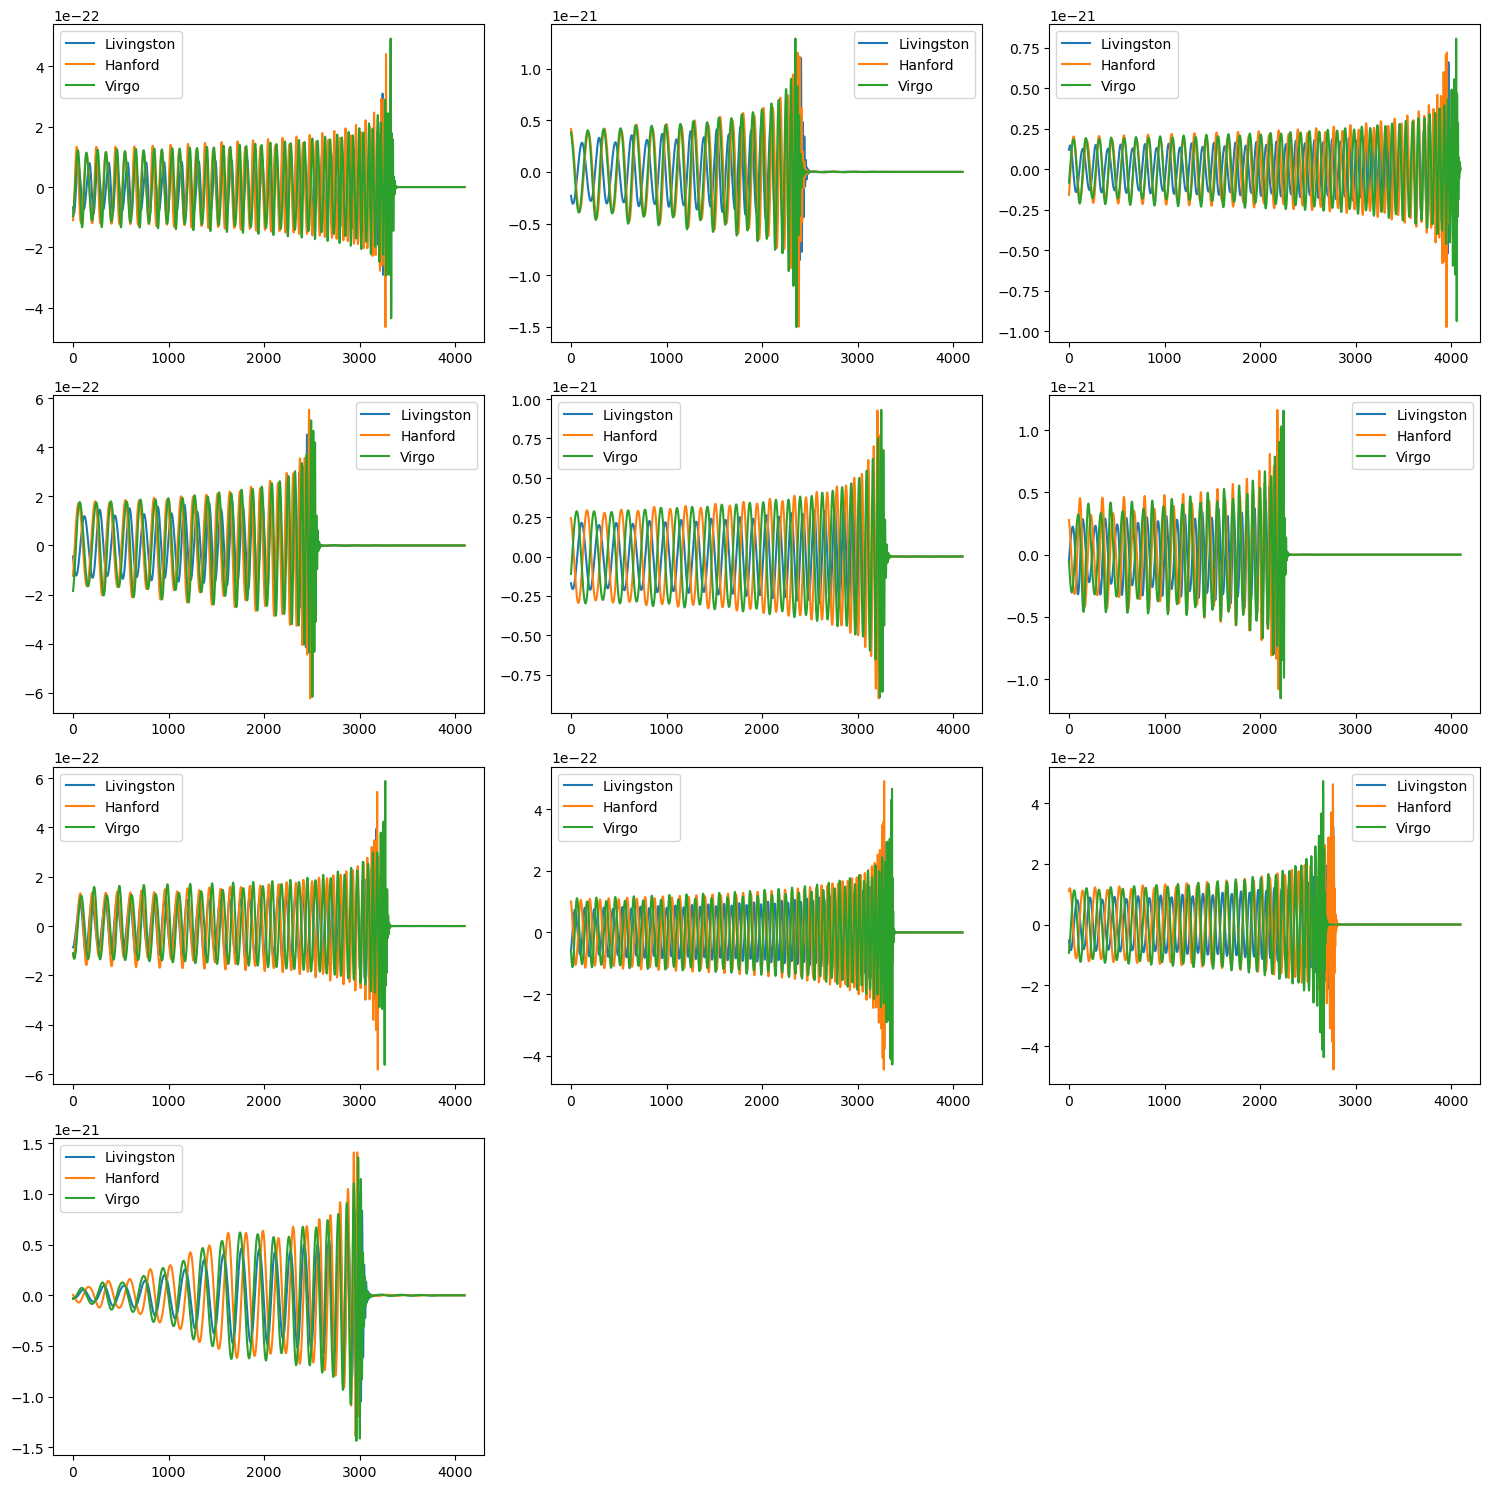

In [4]:
wf_file = '/root/capsule/data/Non_Spin_Waveforms.hdf'
with h5py.File(wf_file, 'r') as f:
    H1_waves=f["H1_wave"][:]
    L1_waves=f["L1_wave"][:]
    V1_waves=f["V1_wave"][:]

fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Adjust size as needed
axs = axs.ravel()  # Flatten the array of axes

for i in range(H1_waves.shape[0]):
    axs[i].plot(L1_waves[i], label='Livingston')
    axs[i].plot(H1_waves[i], label='Hanford')
    axs[i].plot(V1_waves[i], label='Virgo')
    axs[i].legend()

# Remove extra subplots
for i in range(H1_waves.shape[0], 4*3):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

The 10 non-spin waveforms are randomly injected in the 4096s pure noise. The locations are randomly selected and saved in __start_index__. 

For __Inference__ function, it will take in the 4096s strain at 3 channels and inferenced by 4 spin/non-spin models.

For __Inference_Plot__ function, it will take the __union__ of ensemble detection and true positive locations. (i.e. it will contain the plots of not only __True Positives__ but also __False Positives__ and __False Negatives__ if any.) There are also options to customize number of ensemble models. (e.g. 3, 4)

See details of functions in ___utils.py___

Non-Spin 4 Model Ensemble: 1/4
16/16 [==============================] - 40s 3s/step
Non-Spin 4 Model Ensemble: 2/4
16/16 [==============================] - 40s 3s/step
Non-Spin 4 Model Ensemble: 3/4
16/16 [==============================] - 42s 3s/step
Non-Spin 4 Model Ensemble: 4/4
16/16 [==============================] - 40s 3s/step
Ensemble Detection:  [ 270  565  640  785 1390 2120 2730 3075 3500 3575]


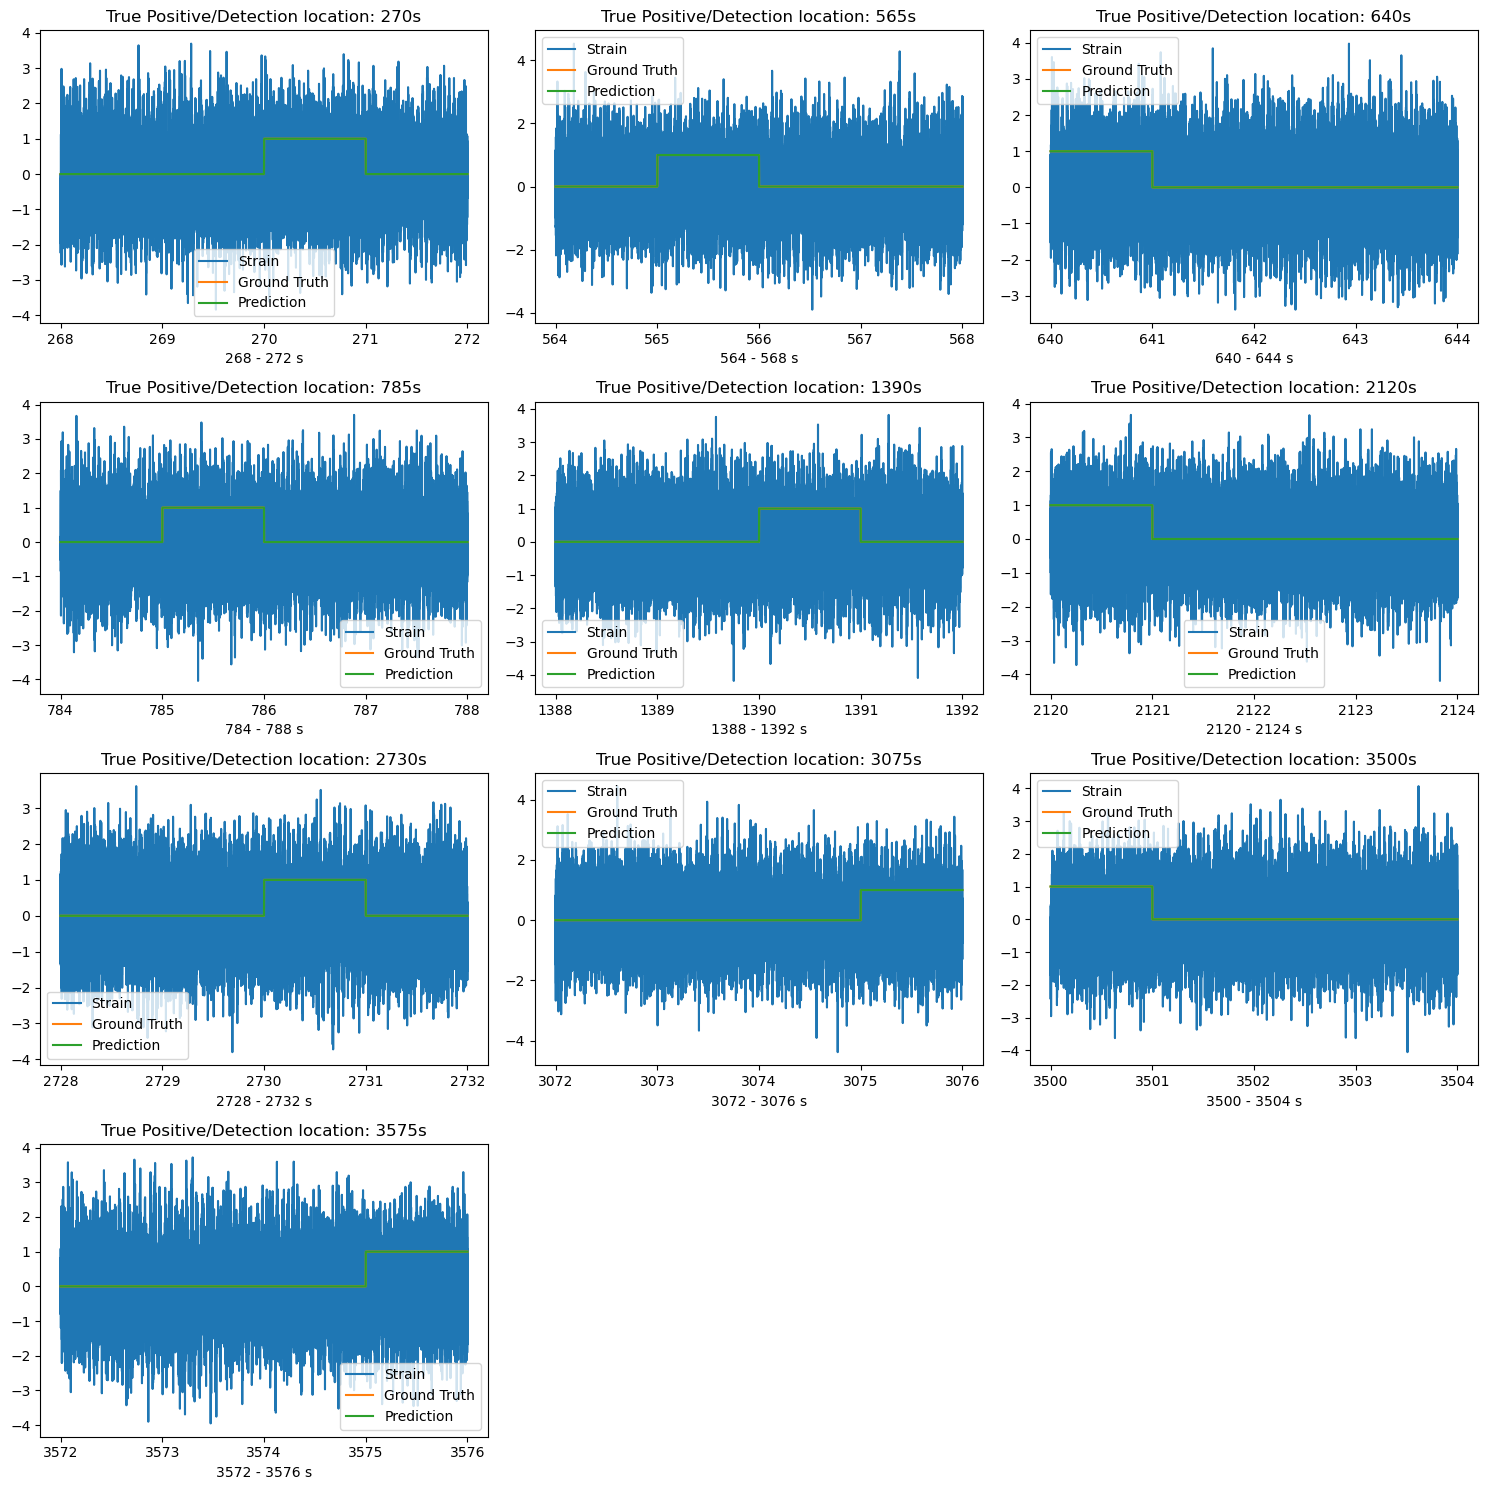

In [5]:
with h5py.File('/root/capsule/data/Non_Spin_Injected.hdf', 'r') as fp:
    injected_H1 = fp['strain_H1'][:]
    injected_L1 = fp['strain_L1'][:]
    injected_V1 = fp['strain_V1'][:]
    start_index = fp['start_index'][:]
detections, Pos = Inference(spin=False, strain_L1 = injected_L1, strain_H1 = injected_H1, strain_V1 = injected_V1)
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=4)

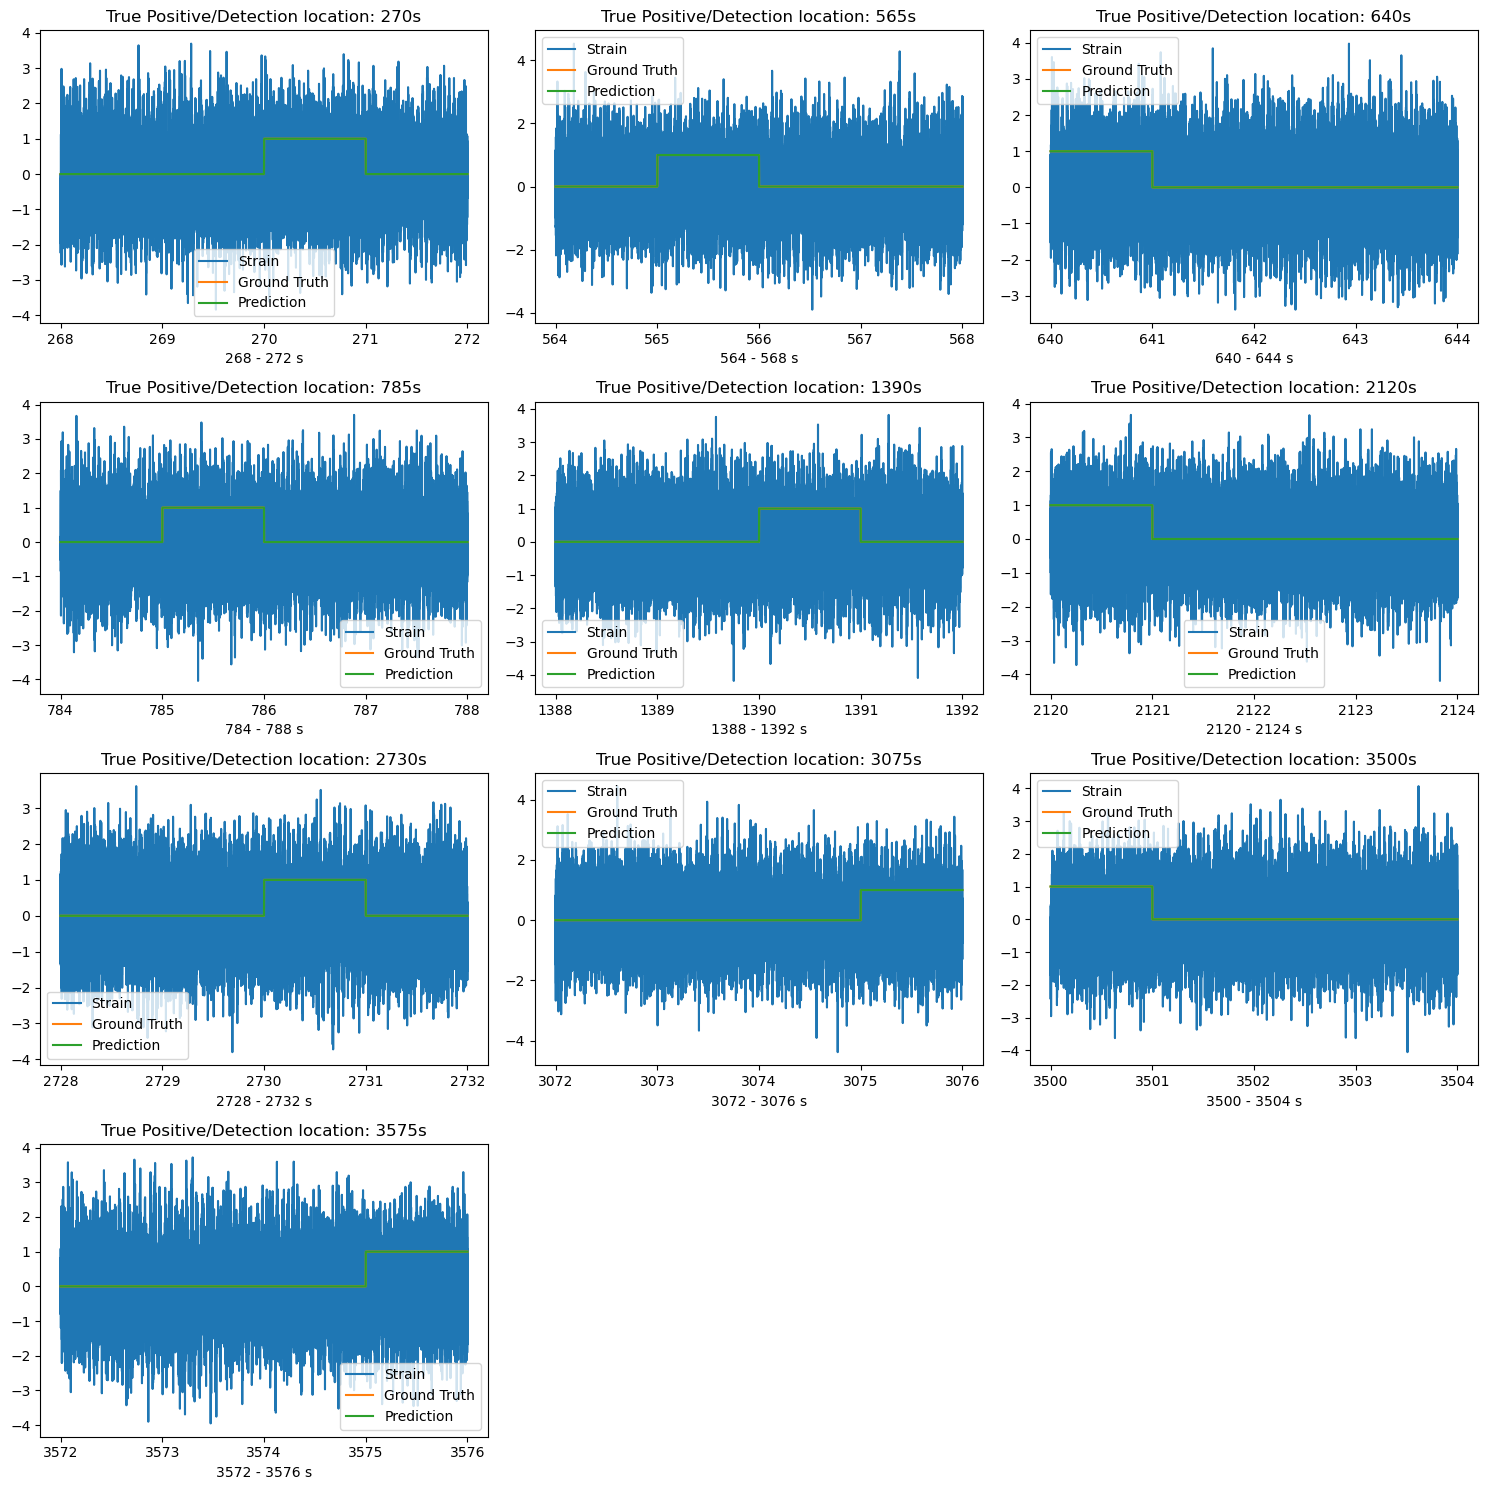

In [6]:
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=3)

# Waveforms for spinning Binary Black Hole Mergers
In ___Spin_Waveforms.hdf___, it saves __10__ sets randomly generated spinning waveforms at __Hanford__, __Livingston__, and __Virgo__ with SNR __8.43__.

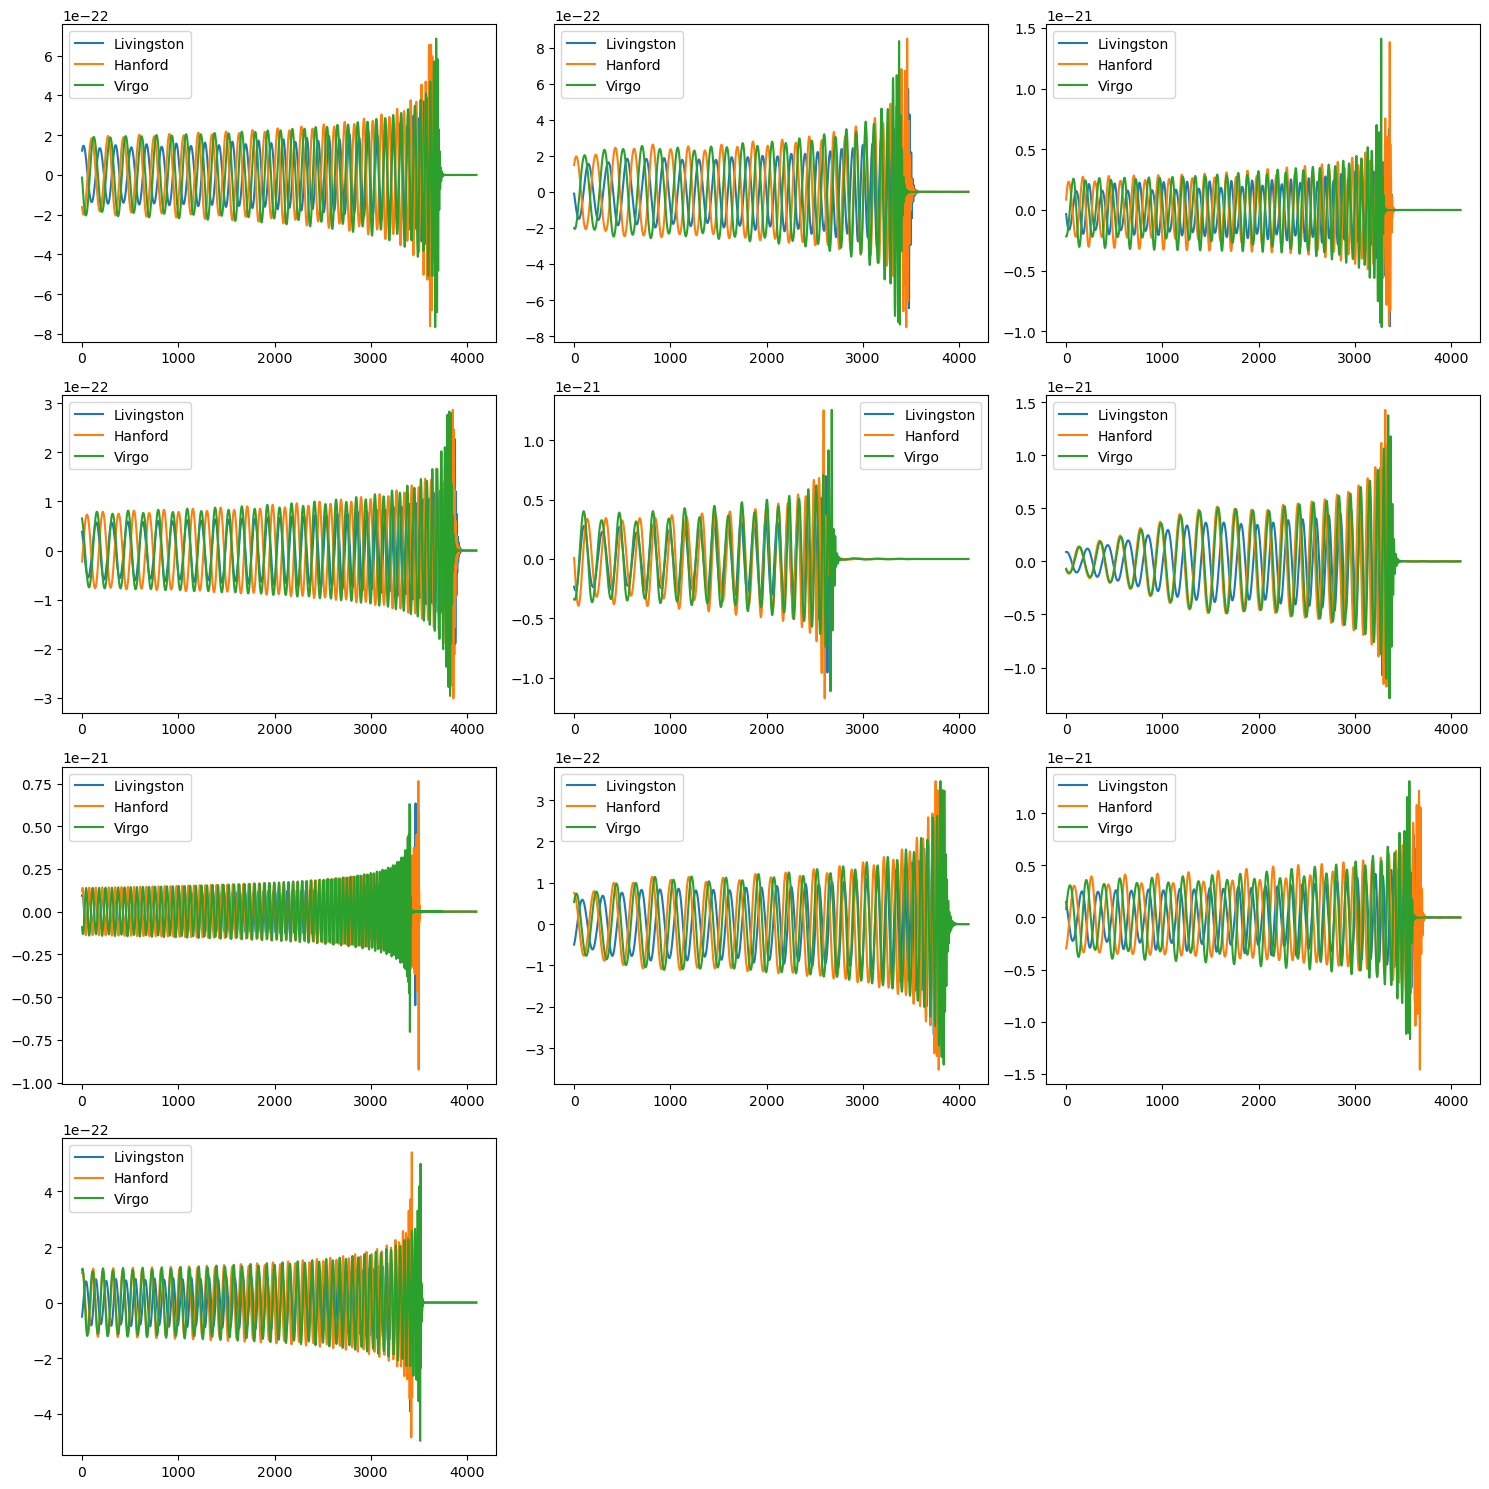

In [7]:
wf_file = '/root/capsule/data/Spin_Waveforms.hdf'
with h5py.File(wf_file, 'r') as f:
    H1_waves=f["H1_wave"][:]
    L1_waves=f["L1_wave"][:]
    V1_waves=f["V1_wave"][:]

fig, axs = plt.subplots(4, 3, figsize=(15, 15)) # Adjust size as needed
axs = axs.ravel()  # Flatten the array of axes

for i in range(H1_waves.shape[0]):
    axs[i].plot(L1_waves[i], label='Livingston')
    axs[i].plot(H1_waves[i], label='Hanford')
    axs[i].plot(V1_waves[i], label='Virgo')
    axs[i].legend()

# Remove extra subplots
for i in range(H1_waves.shape[0], 4*3):
    fig.delaxes(axs[i])

plt.tight_layout()
plt.show()

The 10 spin waveforms are randomly injected in the 4096s pure noise. The locations are randomly selected and saved in __start_index__. 

For __Inference__ function, it will take in the 4096s strain at 3 channels and inferenced by 4 spin/non-spin models.

For __Inference_Plot__ function, it will take the __union__ of ensemble detection and true positive locations. (i.e. it will contain the plots of not only __True Positives__ but also __False Positives__ and __False Negatives__ if any.) There are also options to customize number of ensemble models. (e.g. 3, 4)

See details of functions in ___utils.py___

Spin 4 Model Ensemble: 1/4
16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 2/4
16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 3/4
16/16 [==============================] - 40s 3s/step
Spin 4 Model Ensemble: 4/4
16/16 [==============================] - 40s 3s/step
Ensemble Detection:  [ 100  435  630  745  895 2185 2550 2660 2900 3200]


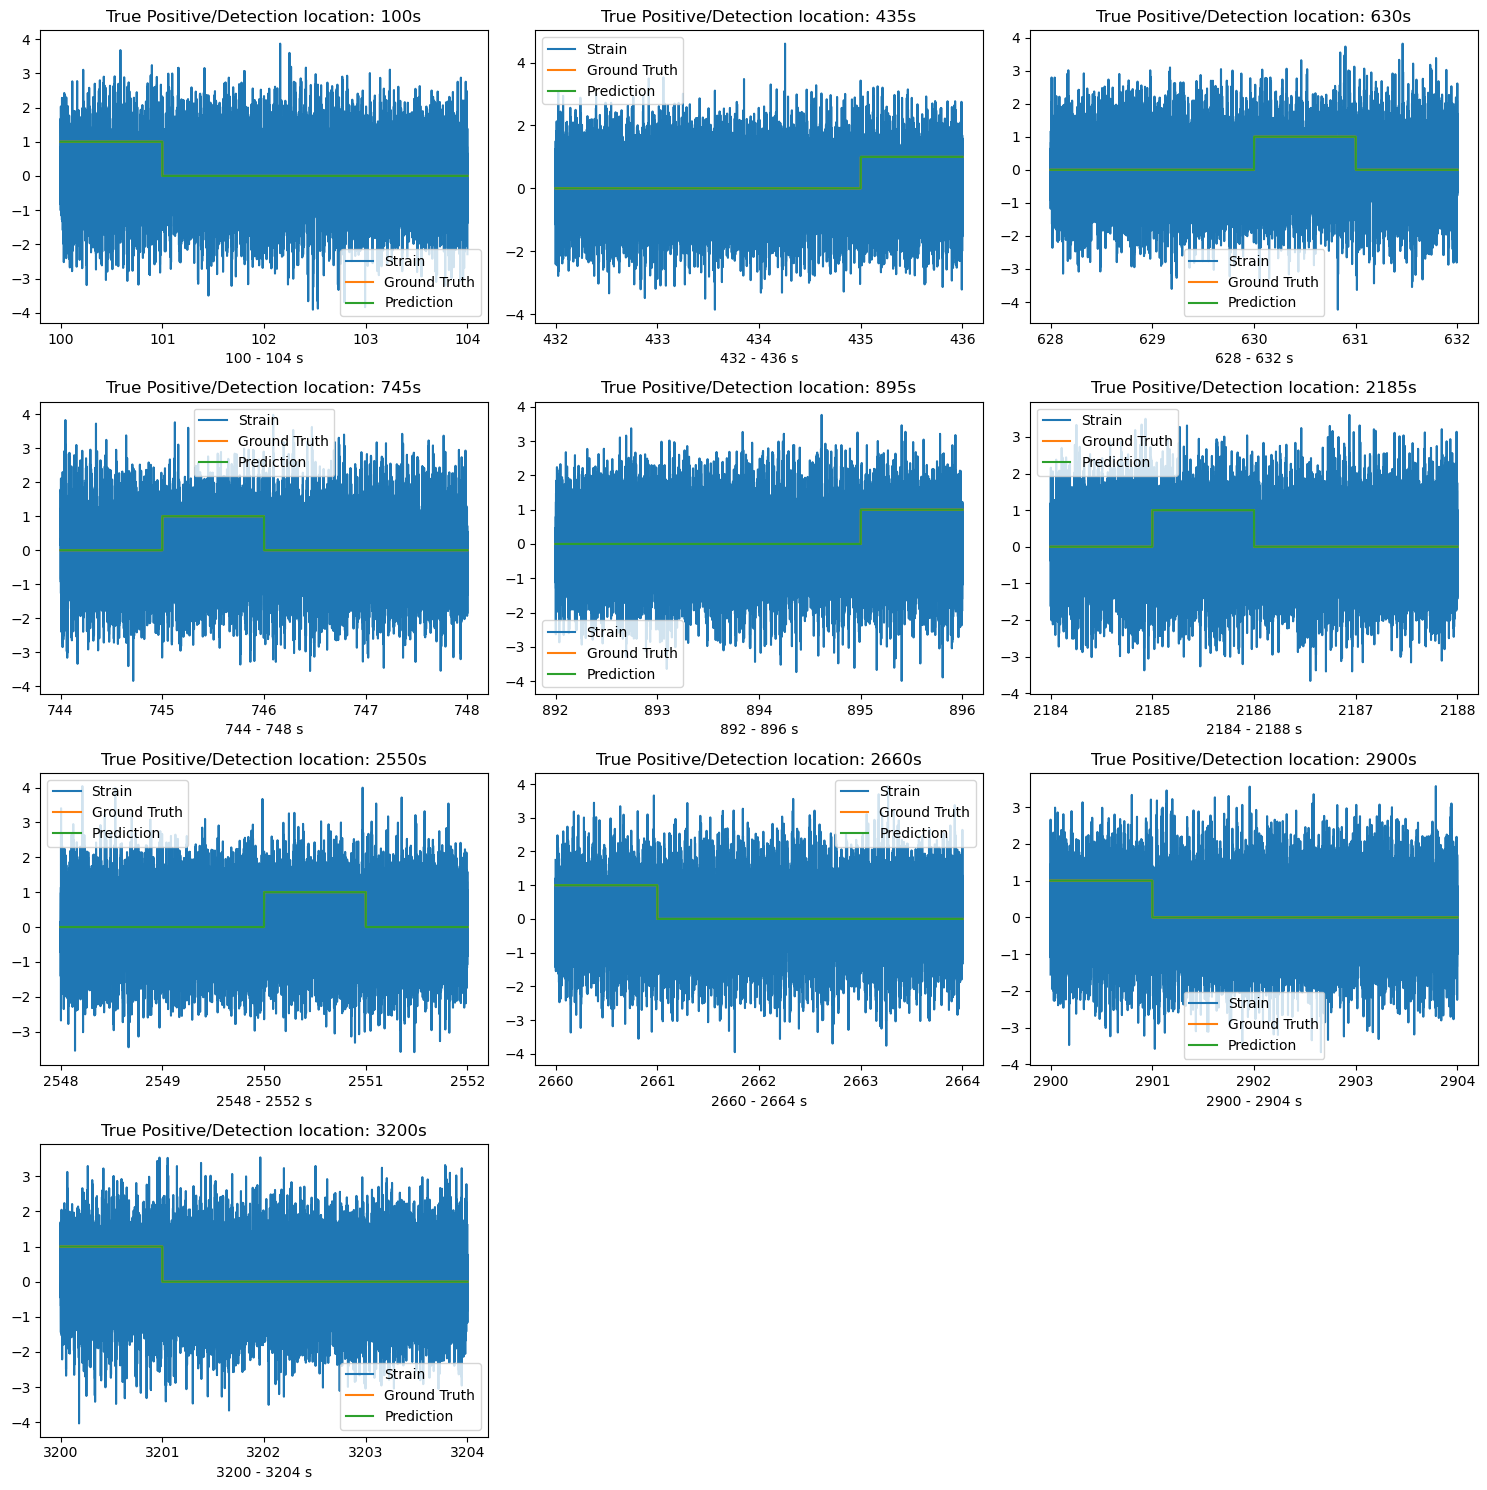

In [8]:
with h5py.File('/root/capsule/data/Spin_Injected.hdf', 'r') as fp:
    injected_H1 = fp['strain_H1'][:]
    injected_L1 = fp['strain_L1'][:]
    injected_V1 = fp['strain_V1'][:]
    start_index = fp['start_index'][:]
detections, Pos = Inference(spin=True, strain_L1 = injected_L1, strain_H1 = injected_H1, strain_V1 = injected_V1)
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=4)

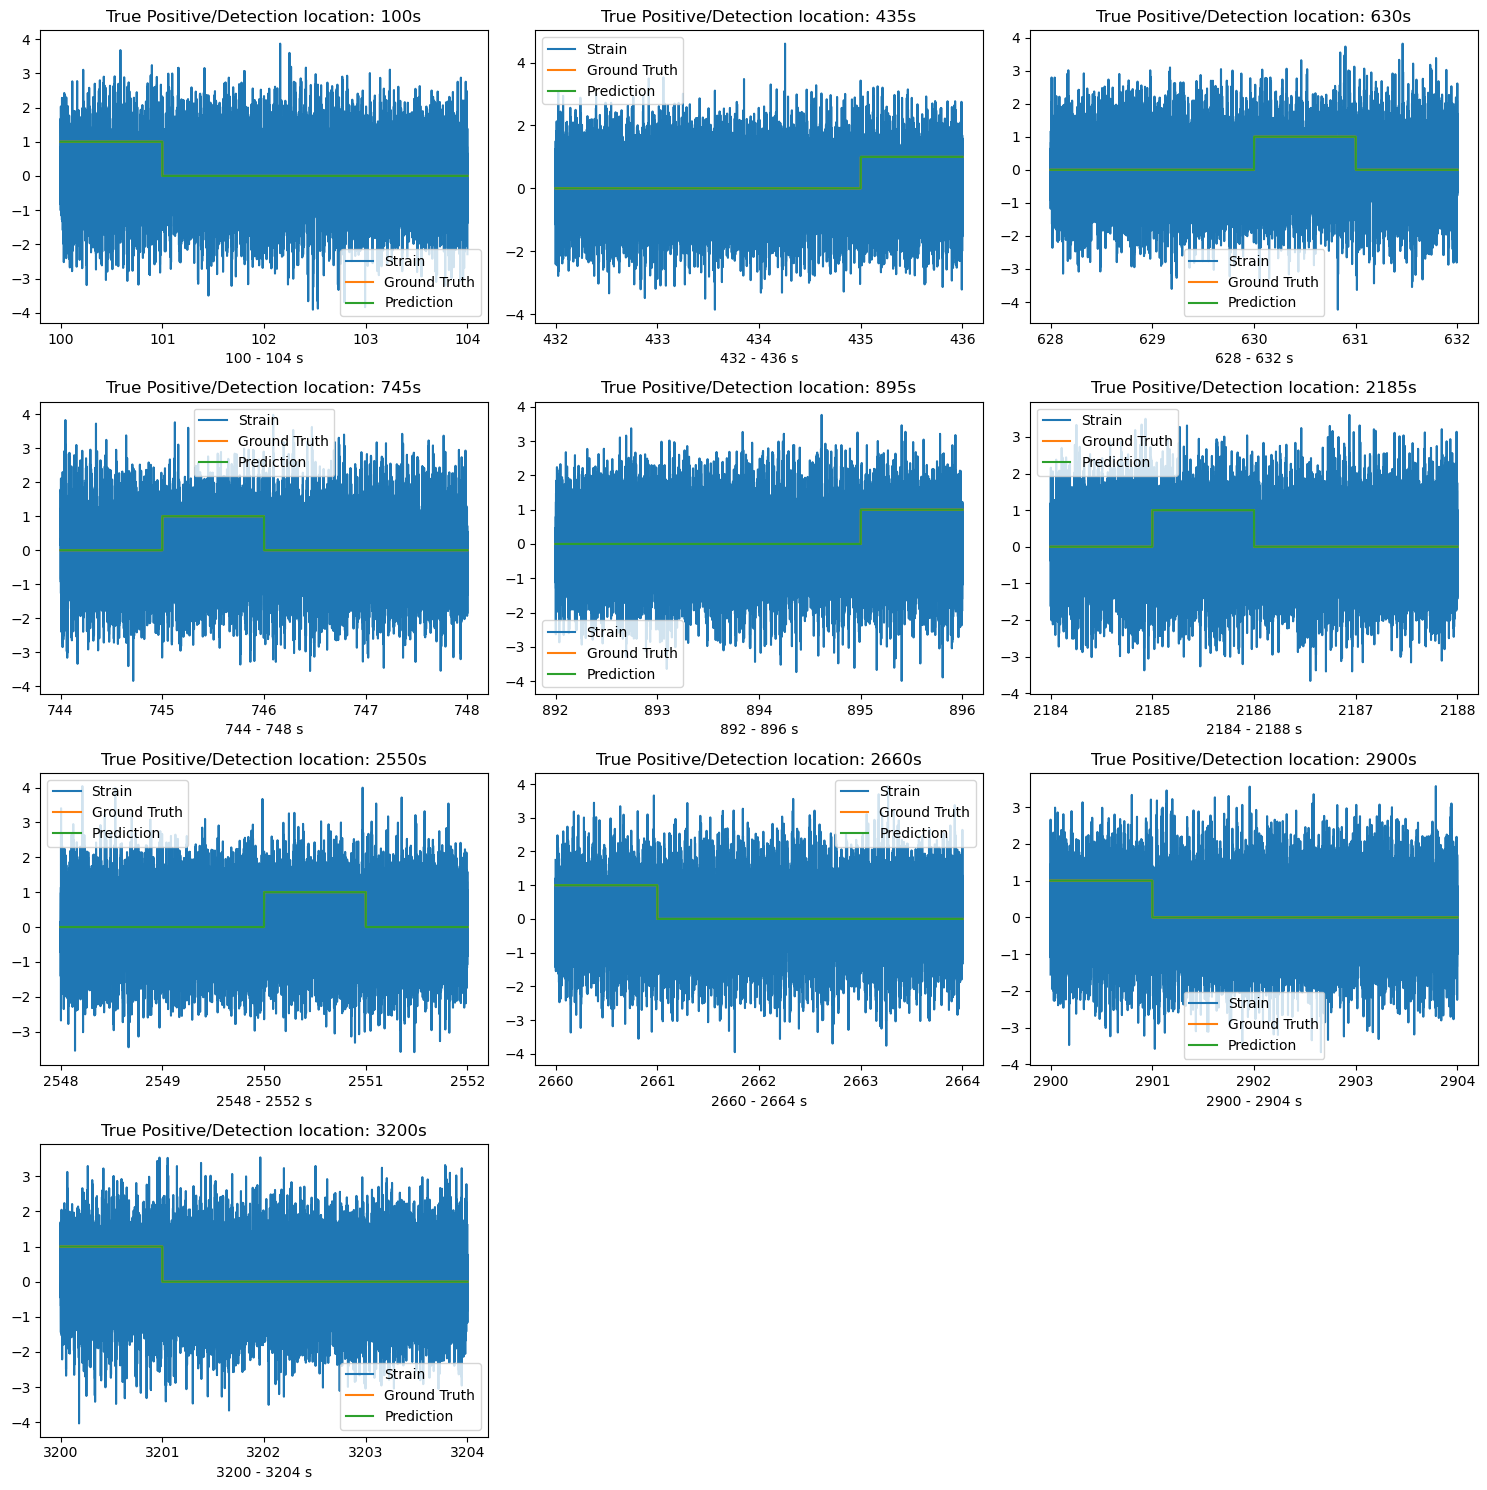

In [9]:
Inference_Plot(injected_H1=injected_H1, start_index=start_index, Pos=Pos, detections=detections, ensemble=3)